In [1]:
# from google.colab import drive
# drive.mount('/content/drive')

In [2]:
# cd /content/drive/MyDrive/KiddeeLab_Min_Project_New/Machine_Learning/Dataset/Movie_dataset

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import string
import random
import warnings
warnings.filterwarnings('ignore')

from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.metrics.pairwise import cosine_similarity

from scipy.sparse.linalg import svds
# from surprise import Reader, Dataset, SVD

In [4]:
Train_df1 = pd.read_csv('../../Dataset/Movie_dataset/tmdb_5000_credits.csv')
Train_df2 = pd.read_csv('../../Dataset/Movie_dataset/tmdb_5000_movies.csv')
Train_df3 = pd.read_csv('../../Dataset/Movie_dataset/ratings.csv')

In [5]:
# Checking number of rows
print(len(Train_df1))
print(len(Train_df2))
print(len(Train_df3))

4803
4803
26024289


In [6]:
Train_df1.head() # movie information

,movie_id,title,cast,crew
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,49026,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,49529,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [7]:
Train_df2.head() # movie based data

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


In [8]:
Train_df3.head() # user based data

,userId,movieId,rating,timestamp
0,1,110,1.0,1425941529
1,1,147,4.5,1425942435
2,1,858,5.0,1425941523
3,1,1221,5.0,1425941546
4,1,1246,5.0,1425941556


**Train data frame 1**

movie_id - A unique identifier for each movie.

cast - The name of lead and supporting actors.

crew - The name of Director, Editor, Composer, Writer etc.

__________________________________________________________________

**Train data frame 2**

budget - The budget in which the movie was made.

genre - The genre of the movie, Action, Comedy ,Thriller etc.

homepage - A link to the homepage of the movie.

id - This is infact the movie_id as in the first dataset.

keywords - The keywords or tags related to the movie.

original_language - The language in which the movie was made.

original_title - The title of the movie before translation or adaptation.

overview - A brief description of the movie.

popularity - A numeric quantity specifying the movie popularity.

production_companies - The production house of the movie.

production_countries - The country in which it was produced.

release_date - The date on which it was released.

revenue - The worldwide revenue generated by the movie.

runtime - The running time of the movie in minutes.

status - "Released" or "Rumored".

tagline - Movie's tagline.

title - Title of the movie.

vote_average - average ratings the movie recieved.

vote_count - the count of votes recieved.

__________________________________________________________________

**Train data frame 3**

user_id - ID of the user

movie_id - ID of the movie in system (same as in first Dataset)

rating - The rating that the specific user give to specific movie

timestamp - the time that user give rating



___________________________________________________________________

***Train_df1 and Train_df2 are from same source.
To perform "User Information Based Recommendation", we need user data. I downloaded user data (Train_df3) from other source.
Therefore, number of movies will not be the same.***


## Merging dataframe

In [9]:
print(Train_df1.columns)
print("############################")
print(Train_df2.columns)

Index(['movie_id', 'title', 'cast', 'crew'], dtype='object')
############################
Index(['budget', 'genres', 'homepage', 'id', 'keywords', 'original_language',
       'original_title', 'overview', 'popularity', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'vote_average',
       'vote_count'],
      dtype='object')


In [10]:
Train_df1 = Train_df1.drop("title", axis = 1)          # title is repeated

In [11]:
Train_df1.columns

Index(['movie_id', 'cast', 'crew'], dtype='object')

In [12]:
Train_df1.columns = Train_df1.columns.str.replace('movie_id', 'id')
Train_df1.head()

,id,cast,crew
0,19995,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,49026,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,49529,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [13]:
Train_df2= Train_df2.merge(Train_df1, on='id')
Train_df2.head(2)


,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,cast,crew
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",...,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."


## Popularity Based Recommender

Example Application of Popularity Based Recommendation on Netflix

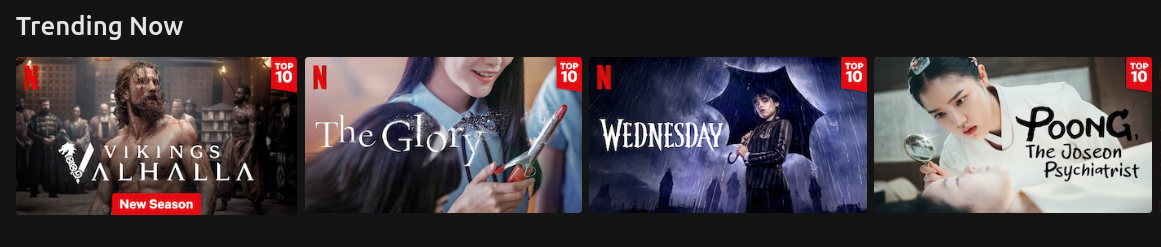

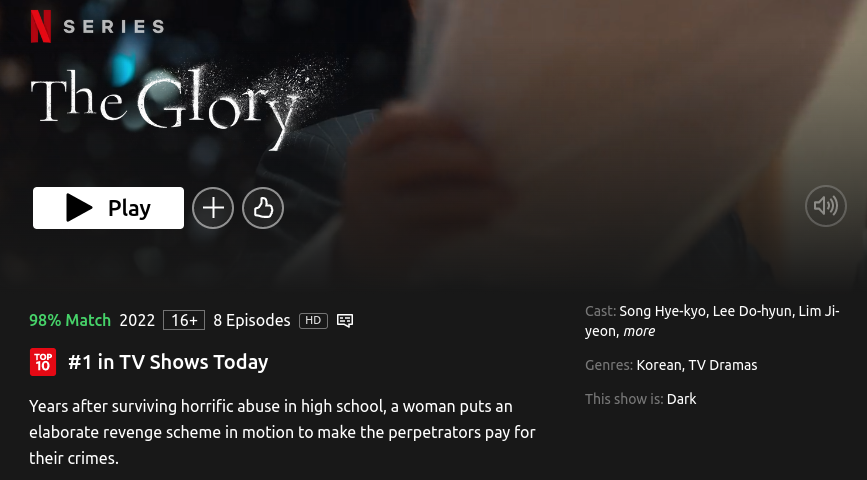

In [14]:
Train_df2.columns

Index(['budget', 'genres', 'homepage', 'id', 'keywords', 'original_language',
       'original_title', 'overview', 'popularity', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'vote_average',
       'vote_count', 'cast', 'crew'],
      dtype='object')

In [15]:
popularity_sorted_df = Train_df2.sort_values('popularity', ascending=False)

popularity_sorted_df.head(3)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,cast,crew
546,74000000,"[{""id"": 10751, ""name"": ""Family""}, {""id"": 16, ""...",http://www.minionsmovie.com/,211672,"[{""id"": 3487, ""name"": ""assistant""}, {""id"": 179...",en,Minions,"Minions Stuart, Kevin and Bob are recruited by...",875.581305,"[{""name"": ""Universal Pictures"", ""id"": 33}, {""n...",...,1156730962,91.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Before Gru, they had a history of bad bosses",Minions,6.4,4571,"[{""cast_id"": 22, ""character"": ""Scarlet Overkil...","[{""credit_id"": ""5431b2b10e0a2656e20026c7"", ""de..."
95,165000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 18, ""...",http://www.interstellarmovie.net/,157336,"[{""id"": 83, ""name"": ""saving the world""}, {""id""...",en,Interstellar,Interstellar chronicles the adventures of a gr...,724.247784,"[{""name"": ""Paramount Pictures"", ""id"": 4}, {""na...",...,675120017,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Mankind was born on Earth. It was never meant ...,Interstellar,8.1,10867,"[{""cast_id"": 9, ""character"": ""Joseph Cooper"", ...","[{""credit_id"": ""52fe4bbf9251416c910e4801"", ""de..."
788,58000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.foxmovies.com/movies/deadpool,293660,"[{""id"": 2095, ""name"": ""anti hero""}, {""id"": 307...",en,Deadpool,Deadpool tells the origin story of former Spec...,514.569956,"[{""name"": ""Twentieth Century Fox Film Corporat...",...,783112979,108.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Witness the beginning of a happy ending,Deadpool,7.4,10995,"[{""cast_id"": 99, ""character"": ""Wade Wilson / D...","[{""credit_id"": ""56c986b2925141172f0068b6"", ""de..."


In [16]:
popularity_sorted_df.columns.values

array(['budget', 'genres', 'homepage', 'id', 'keywords',
       'original_language', 'original_title', 'overview', 'popularity',
       'production_companies', 'production_countries', 'release_date',
       'revenue', 'runtime', 'spoken_languages', 'status', 'tagline',
       'title', 'vote_average', 'vote_count', 'cast', 'crew'],
      dtype=object)

In [17]:
print("Top 5 popular movies:\n")
top_popular_movie = popularity_sorted_df["title"].head(5).values

for movie_name in top_popular_movie:
  print(movie_name)

Top 5 popular movies:

Minions
Interstellar
Deadpool
Guardians of the Galaxy
Mad Max: Fury Road


In [18]:
genres_list = popularity_sorted_df["genres"].head(1).values

for i in range(len(genres_list)):
  first = genres_list[i].split("name")
  genres = []
  for j in range(len(first)):
    # print(first[j])
    before_genre = '": "'
    after_genre = '"}'
    if j != 0:
      idx1 = first[j].index(before_genre)
      idx2 = first[j].index(after_genre)
      genres_name = ''
      for idx in range(idx1 + len(before_genre) , idx2):
        genres_name = genres_name + first[j][idx]
      genres.append(genres_name)

print(genres)


['Family', 'Animation', 'Adventure', 'Comedy']


In [19]:
def filter_text(string_text, key ,before_text, after_text):       # make it as a function
    first = string_text.split(key)
    output = []
    for j in range(len(first)):
      # print(first[1])
      if j != 0:
        print(first[j])
        idx1 = first[j].index(before_text)
        idx2 = first[j].index(after_text)
        result = ''
        for idx in range(idx1 + len(before_text) , idx2):
          result = result + first[j][idx]
        output.append(result)
    return output

key = 'name'
before_text = '": "'
after_text = '"}'
list_string = popularity_sorted_df["genres"].head(1).values
# print(list_string[0])
output_list = filter_text(list_string[0], key, before_text, after_text)
print(output_list)

key = 'character'
before_text = '": "'
after_text = '",'
list_string = popularity_sorted_df["cast"].head(1).values
output_list = filter_text(list_string[0], key, before_text, after_text)
print(output_list)

": "Family"}, {"id": 16, "
": "Animation"}, {"id": 12, "
": "Adventure"}, {"id": 35, "
": "Comedy"}]
['Family', 'Animation', 'Adventure', 'Comedy']
": "Scarlet Overkill (voice)", "credit_id": "54cd4a5d9251414755001dae", "gender": 1, "id": 18277, "name": "Sandra Bullock", "order": 0}, {"cast_id": 24, "
": "Herb Overkill (voice)", "credit_id": "54cd4aa9c3a3687f84001f92", "gender": 2, "id": 65717, "name": "Jon Hamm", "order": 1}, {"cast_id": 28, "
": "Walter Nelson (voice)", "credit_id": "55440dda92514119e00000d1", "gender": 2, "id": 2232, "name": "Michael Keaton", "order": 2}, {"cast_id": 29, "
": "Madge Nelson (voice)", "credit_id": "55440de3c3a3680cdf002c7f", "gender": 1, "id": 19, "name": "Allison Janney", "order": 3}, {"cast_id": 31, "
": "Professor Flux / Tower Guard (voice)", "credit_id": "55440dfcc3a3680cd5002c8a", "gender": 2, "id": 4581, "name": "Steve Coogan", "order": 4}, {"cast_id": 33, "
": "Reine Elizabeth II (voice)", "credit_id": "55440e27925141586d002aac", "gender": 1, "

In [20]:
def recommendation_by_popularity(dataset, num_movie): # like trending movie (not related to voting), example: top most watched movies
  movie_list = dataset["title"].head(num_movie).values
  cast_list = dataset["cast"].head(num_movie).values
  release_date_list = dataset["release_date"].head(num_movie).values
  genres_list = dataset["genres"].head(num_movie).values
  overview_list = dataset["overview"].head(num_movie).values

  for i in range(0, num_movie):
    print(f"Top {i+1} Movie's Information")
    print("Movie Name:", movie_list[i])
    print("Released Date:", release_date_list[i])

    key = 'name'
    before_text = '": "'
    after_text = '"}'
    genres = filter_text(genres_list[i], key, before_text, after_text)
    print("Genres:", genres)

    key = 'character'
    before_text = '": "'
    after_text = '",'
    casts = filter_text(cast_list[i], key, before_text, after_text)
    print("Casts:", casts)

    print("Overview:", overview_list[i])
    print("#########################################################")

In [21]:
number_of_movie = 5
recommendation_by_popularity(popularity_sorted_df, number_of_movie)

Top 1 Movie's Information
Movie Name: Minions
Released Date: 2015-06-17
": "Family"}, {"id": 16, "
": "Animation"}, {"id": 12, "
": "Adventure"}, {"id": 35, "
": "Comedy"}]
Genres: ['Family', 'Animation', 'Adventure', 'Comedy']
": "Scarlet Overkill (voice)", "credit_id": "54cd4a5d9251414755001dae", "gender": 1, "id": 18277, "name": "Sandra Bullock", "order": 0}, {"cast_id": 24, "
": "Herb Overkill (voice)", "credit_id": "54cd4aa9c3a3687f84001f92", "gender": 2, "id": 65717, "name": "Jon Hamm", "order": 1}, {"cast_id": 28, "
": "Walter Nelson (voice)", "credit_id": "55440dda92514119e00000d1", "gender": 2, "id": 2232, "name": "Michael Keaton", "order": 2}, {"cast_id": 29, "
": "Madge Nelson (voice)", "credit_id": "55440de3c3a3680cdf002c7f", "gender": 1, "id": 19, "name": "Allison Janney", "order": 3}, {"cast_id": 31, "
": "Professor Flux / Tower Guard (voice)", "credit_id": "55440dfcc3a3680cd5002c8a", "gender": 2, "id": 4581, "name": "Steve Coogan", "order": 4}, {"cast_id": 33, "
": "Rein

## Rating Based Recommender

Example Application

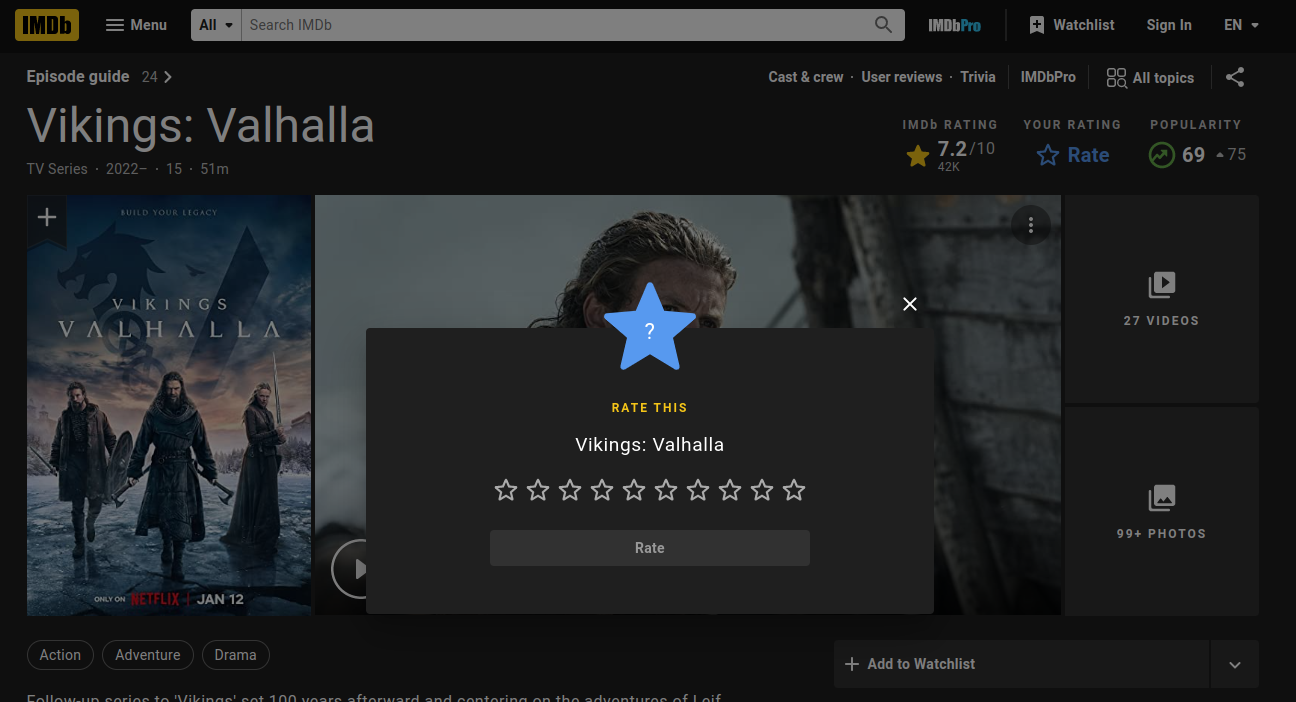

**Quantile Funciton**

Given a vector V of length n, the q-th quantile of V is the value q of the way from the minimum to the maximum in a sorted copy of V. The values and distances of the two nearest neighbors as well as the method parameter will determine the quantile if the normalized ranking does not match the location of q exactly. This function is the same as the median if q=0.5, the same as the minimum if q=0.0 and the same as the maximum if q=1.0.

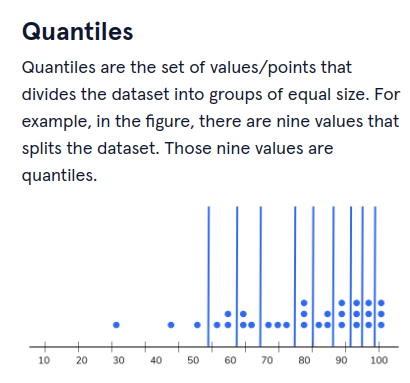

In [22]:
Train_df2.columns

Index(['budget', 'genres', 'homepage', 'id', 'keywords', 'original_language',
       'original_title', 'overview', 'popularity', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'vote_average',
       'vote_count', 'cast', 'crew'],
      dtype='object')

In [23]:
mean_vote = Train_df2['vote_average'].mean()
min_vote_threshold = Train_df2['vote_count'].quantile(0.9)
print("Mean rating in dataset:", mean_vote)
print("Minimum number of vote count:", min_vote_threshold)

rating_based_df = Train_df2.copy().loc[Train_df2['vote_count'] >= min_vote_threshold]      # create new data frame
print(len(rating_based_df)) # checking number of rows inside rating_based_df
rating_based_df.head(2)

Mean rating in dataset: 6.092171559442016
Minimum number of vote count: 1838.4000000000015
481


,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,cast,crew
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",...,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."


In [24]:
rating_based_df.columns

Index(['budget', 'genres', 'homepage', 'id', 'keywords', 'original_language',
       'original_title', 'overview', 'popularity', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'vote_average',
       'vote_count', 'cast', 'crew'],
      dtype='object')

In [25]:
mean_vote = Train_df2['vote_average'].mean()
min_vote_threshold = Train_df2['vote_count'].quantile(0.9)

def weighted_rating(data_frame):
    num_of_vote = data_frame['vote_count']
    Avg_rating = data_frame['vote_average']
    # Calculation based on the IMDB formula
    score = (num_of_vote/(num_of_vote + min_vote_threshold) * Avg_rating) + \
        (min_vote_threshold/(min_vote_threshold + num_of_vote) * mean_vote)
    return score

In [26]:
# Define a new feature 'score' and calculate its value with `weighted_rating()`
rating_based_df['score'] = rating_based_df.apply(weighted_rating, axis=1)

In [27]:
rating_based_df.columns # now we have new column called "score"

Index(['budget', 'genres', 'homepage', 'id', 'keywords', 'original_language',
       'original_title', 'overview', 'popularity', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'vote_average',
       'vote_count', 'cast', 'crew', 'score'],
      dtype='object')

In [28]:
rating_based_df.head(1)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,cast,crew,score
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de...",7.050669


In [29]:
#Sort movies based on score calculated above
rating_based_df = rating_based_df.sort_values('score', ascending=False)

#Print the top 15 movies
rating_based_df[['title', 'vote_count', 'vote_average', 'score']].head(5)

,title,vote_count,vote_average,score
1881,The Shawshank Redemption,8205,8.5,8.059258
662,Fight Club,9413,8.3,7.939256
65,The Dark Knight,12002,8.2,7.920020
3232,Pulp Fiction,8428,8.3,7.904645
96,Inception,13752,8.1,7.863239


In [30]:
def recommendation_by_rating(dataset, num_movie): # like trending movie (not related to voting), example: top most watched movies
  movie_list = dataset["title"].head(num_movie).values
  cast_list = dataset["cast"].head(num_movie).values
  release_date_list = dataset["release_date"].head(num_movie).values
  genres_list = dataset["genres"].head(num_movie).values
  rating_list = dataset["score"].head(num_movie).values
  overview_list = dataset["overview"].head(num_movie).values

  for i in range(0, num_movie):
    print(f"Top {i+1} Movie's Information")
    print("Movie Name:", movie_list[i])
    print("Rating:", round(rating_list[i],2))
    print("Released Date:", release_date_list[i])

    key = 'name'
    before_text = '": "'
    after_text = '"}'
    genres = filter_text(genres_list[i], key, before_text, after_text)
    print("Genres:", genres)

    key = 'character'
    before_text = '": "'
    after_text = '",'
    casts = filter_text(cast_list[i], key, before_text, after_text)
    print("Casts:", casts)

    print("Overview:", overview_list[i])
    print("#########################################################")

In [31]:
number_of_movie = 5
recommendation_by_rating(rating_based_df, number_of_movie)

Top 1 Movie's Information
Movie Name: The Shawshank Redemption
Rating: 8.06
Released Date: 1994-09-23
": "Drama"}, {"id": 80, "
": "Crime"}]
Genres: ['Drama', 'Crime']
": "Andy Dufresne", "credit_id": "52fe4231c3a36847f800b131", "gender": 2, "id": 504, "name": "Tim Robbins", "order": 0}, {"cast_id": 4, "
": "Ellis Boyd 'Red' Redding", "credit_id": "52fe4231c3a36847f800b135", "gender": 2, "id": 192, "name": "Morgan Freeman", "order": 1}, {"cast_id": 5, "
": "Warden Samuel Norton", "credit_id": "52fe4231c3a36847f800b139", "gender": 2, "id": 4029, "name": "Bob Gunton", "order": 2}, {"cast_id": 8, "
": "Captain Byron T. Hadley", "credit_id": "52fe4231c3a36847f800b141", "gender": 2, "id": 6574, "name": "Clancy Brown", "order": 3}, {"cast_id": 10, "
": "Bogs Diamond", "credit_id": "52fe4231c3a36847f800b149", "gender": 2, "id": 6576, "name": "Mark Rolston", "order": 4}, {"cast_id": 11, "
": "Brooks Hatlen", "credit_id": "52fe4231c3a36847f800b14d", "gender": 2, "id": 6577, "name": "James Whitm

## Content Based Filtering - Plot description based Recommender

Example Application

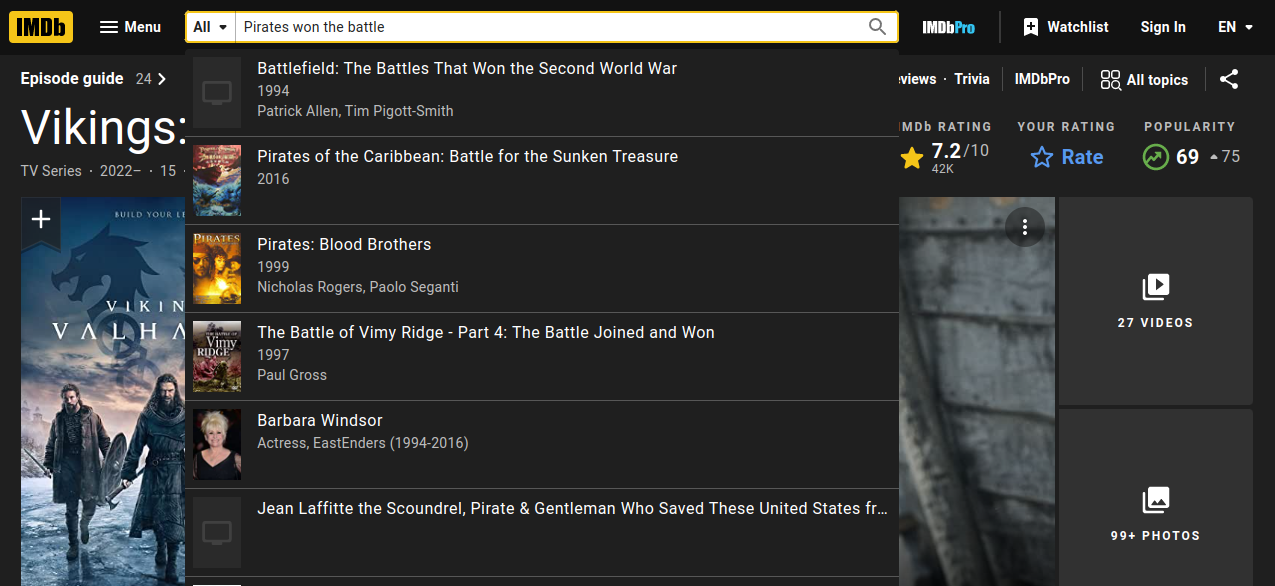

We will compute pairwise similarity scores for all movies based on their plot descriptions and recommend movies based on that similarity score.

The plot description is given in the overview feature of our dataset. Let's take a look at the data.

In [32]:
New_df = Train_df2.copy()
vectorizer = TfidfVectorizer(stop_words='english')

New_df['overview'] = New_df['overview'].fillna('')
for i in range(len(New_df)):
  New_df['overview'][i] = New_df['overview'][i].lower()


vectorizer.fit(New_df['overview'])

tfidf_matrix = vectorizer.transform(New_df['overview'])

print(tfidf_matrix.shape)

(4803, 20978)


### Finding Cosine Similarity like in chat bot

In [33]:
overview_content_df = Train_df2.copy()
overview_content_df['overview'] = overview_content_df['overview'].fillna('')

for i in range(len(overview_content_df)):
  overview_content_df['overview'][i] = overview_content_df['overview'][i].lower()

print(overview_content_df.shape)
print(overview_content_df['overview'].head())

(4803, 22)
0    in the 22nd century, a paraplegic marine is di...
1    captain barbossa, long believed to be dead, ha...
2    a cryptic message from bond’s past sends him o...
3    following the death of district attorney harve...
4    john carter is a war-weary, former military ca...
Name: overview, dtype: object


In [34]:
movie_plot = "Batman save the city." # User input
movie_plot_vectorized = vectorizer.transform([movie_plot]) # transform the user input
cos_sims = []
top_movies = []
for overview_content in New_df['overview']:
  sims = cosine_similarity(vectorizer.transform([overview_content]), movie_plot_vectorized)
  cos_sims.append(sims)


In [35]:
index = cos_sims.index(max(cos_sims)) #finding the index of the highest score from cosine similarity
print("Search: ", movie_plot)
print("Recommended Movie: ", Train_df2['title'][overview_content_df.index[index]])

Search:  Batman save the city.
Recommended Movie:  Batman: The Dark Knight Returns, Part 2


In [36]:
# Show 5 top related movies
cos_sims_list = []
index_list = []

for index, values in enumerate(cos_sims):
    cos_sims_list.append((values, index))       # Put values in index 0 because we want to sort the values
cos_sims_list.sort(reverse=True)     # if reverse = True, it will sort starting with highest values

for i in cos_sims_list[:5]:             # Take indexs of first 5 values which are the 5 highest cosine similarity values
    index_list.append(i[1])             # i[1] means we are taking the index


print("Top 5 Recommended Movies:\n")
for i, index in enumerate(index_list):
  print("Top", i + 1, ":",Train_df2['title'][overview_content_df.index[index]])

Top 5 Recommended Movies:

Top 1 : Batman: The Dark Knight Returns, Part 2
Top 2 : Batman Returns
Top 3 : The Dark Knight Rises
Top 4 : The Dark Knight
Top 5 : Batman Forever


### Make a function for testing


In [37]:
def get_top5_movie_recommendation(movie_plot):
  movie_plot_vectorized = vectorizer.transform([movie_plot])
  cos_sims = []
  top_movies = []
  for overview_content in New_df['overview']:
    sims = cosine_similarity(vectorizer.transform([overview_content]), movie_plot_vectorized)
    cos_sims.append(sims)

  cos_sims_list = []
  index_list = []

  for index, values in enumerate(cos_sims):
      cos_sims_list.append((values, index))       # Put values in index 0 because we want to sort the values
  cos_sims_list.sort(reverse=True)     # if reverse = True, it will sort starting with highest values

  for i in cos_sims_list[:5]:             # Take indexs of first 5 values which are the 5 highest cosine similarity values
      index_list.append(i[1])             # i[1] means we are taking the index

  print("Top 5 Recommended Movies:\n")
  for i, index in enumerate(index_list):
    print("Top", i + 1, ":",Train_df2['title'][overview_content_df.index[index]])



In [38]:
def recommendation_by_rating(dataset, num_movie): # like trending movie (not related to voting), example: top most watched movies
  movie_list = dataset["title"].head(num_movie).values
  cast_list = dataset["cast"].head(num_movie).values
  release_date_list = dataset["release_date"].head(num_movie).values
  genres_list = dataset["genres"].head(num_movie).values
  rating_list = dataset["score"].head(num_movie).values
  overview_list = dataset["overview"].head(num_movie).values

  for i in range(0, num_movie):
    print(f"Top {i+1} Movie's Information")
    print("Movie Name:", movie_list[i])
    print("Rating:", round(rating_list[i],2))
    print("Released Date:", release_date_list[i])

    key = 'name'
    before_text = '": "'
    after_text = '"}'
    genres = filter_text(genres_list[i], key, before_text, after_text)
    print("Genres:", genres)

    key = 'character'
    before_text = '": "'
    after_text = '",'
    casts = filter_text(cast_list[i], key, before_text, after_text)
    print("Casts:", casts)

    print("Overview:", overview_list[i])
    print("#########################################################")

In [39]:
def get_top5_movie_recommendation(movie_plot):
  movie_plot_vectorized = vectorizer.transform([movie_plot])
  cos_sims = []
  top_movies = []
  for overview_content in New_df['overview']:
    sims = cosine_similarity(vectorizer.transform([overview_content]), movie_plot_vectorized)
    cos_sims.append(sims)

  cos_sims_list = []
  index_list = []

  for index, values in enumerate(cos_sims):
      cos_sims_list.append((values, index))       # Put values in index 0 because we want to sort the values
  cos_sims_list.sort(reverse=True)     # if reverse = True, it will sort starting with highest values

  for i in cos_sims_list[:5]:             # Take indexs of first 5 values which are the 5 highest cosine similarity values
      index_list.append(i[1])             # i[1] means we are taking the index

  print("Top 5 Recommended Movies:\n")
  movie_list = []
  cast_list = []
  release_date_list = []
  genres_list = []
  overview_list = []
  for i, index in enumerate(index_list):
    movie_list.append(Train_df2['title'][overview_content_df.index[index]])
    cast_list.append(Train_df2['cast'][overview_content_df.index[index]])
    release_date_list.append(Train_df2['release_date'][overview_content_df.index[index]])
    genres_list.append(Train_df2['genres'][overview_content_df.index[index]])
    overview_list.append(Train_df2['overview'][overview_content_df.index[index]])

  for i in range(len(movie_list)):
    print(f"Top {i+1} Movie's Information")
    print("Movie Name:", movie_list[i])
    print("Released Date:", release_date_list[i])

    key = 'name'
    before_text = '": "'
    after_text = '"}'
    genres = filter_text(genres_list[i], key, before_text, after_text)
    print("Genres:", genres)

    key = 'character'
    before_text = '": "'
    after_text = '",'
    casts = filter_text(cast_list[i], key, before_text, after_text)
    print("Casts:", casts)

    print("Overview:", overview_list[i])
    print("#########################################################")


In [40]:
movie_plot = "Pirates won the battle"
get_top5_movie_recommendation(movie_plot)

Top 5 Recommended Movies:

Top 1 Movie's Information
Movie Name: Ice Age: Continental Drift
Released Date: 2012-06-26
": "Animation"}, {"id": 35, "
": "Comedy"}, {"id": 12, "
": "Adventure"}, {"id": 10751, "
": "Family"}]
Genres: ['Animation', 'Comedy', 'Adventure', 'Family']
": "Sid (voice)", "credit_id": "52fe4945c3a36847f8191f47", "gender": 2, "id": 5723, "name": "John Leguizamo", "order": 0}, {"cast_id": 4, "
": "Manny (voice)", "credit_id": "52fe4945c3a36847f8191f4b", "gender": 2, "id": 15757, "name": "Ray Romano", "order": 1}, {"cast_id": 2, "
": "Scrat (voice)", "credit_id": "52fe4945c3a36847f8191f43", "gender": 2, "id": 5713, "name": "Chris Wedge", "order": 2}, {"cast_id": 5, "
": "Diego (voice)", "credit_id": "52fe4945c3a36847f8191f4f", "gender": 2, "id": 5724, "name": "Denis Leary", "order": 3}, {"cast_id": 9, "
": "Crash (voice)", "credit_id": "52fe4945c3a36847f8191f65", "gender": 2, "id": 57599, "name": "Seann William Scott", "order": 4}, {"cast_id": 10, "
": "Shira (voice)

## User Information Based Recommendation

In [41]:
Train_df3.head(2)

,userId,movieId,rating,timestamp
0,1,110,1.0,1425941529
1,1,147,4.5,1425942435


In [42]:
print("length of dataset:",  len(Train_df3))

n_users = Train_df3["userId"].unique()
print("Number of users in dataset", len(n_users))

n_movies= Train_df3["movieId"].unique()
print("Number of movies in dataset", len(n_movies))

length of dataset: 26024289
Number of users in dataset 270896
Number of movies in dataset 45115


In [43]:
Data_frame_3 = Train_df3[:100000].copy()
print("length of dataset:",  len(Data_frame_3))

length of dataset: 100000


In [44]:
Data_frame_3.head(3)

,userId,movieId,rating,timestamp
0,1,110,1.0,1425941529
1,1,147,4.5,1425942435
2,1,858,5.0,1425941523


In [45]:
n_users = Data_frame_3["userId"].unique()
print("Number of users in dataset", len(n_users))

n_movies= Data_frame_3["movieId"].unique()
print("Number of movies in dataset", len(n_movies))

Number of users in dataset 1014
Number of movies in dataset 8832


In [46]:
print("Total movies that we have the info",len(Train_df2))

Total movies that we have the info 4803


As I mentioned above, data are from different soruce. Thus, total movies will be different.

In [47]:
print(f"Starting ID of user: {np.unique(np.array(n_users))[0]} and Last ID of user: {np.unique(np.array(n_users))[-1]}")
print(f"Starting ID of movies: {np.unique(np.array(n_movies))[0]} and Last ID of movies: {np.unique(np.array(n_movies))[-1]}")

Starting ID of user: 1 and Last ID of user: 1014
Starting ID of movies: 1 and Last ID of movies: 176271


In [48]:
Data_frame_3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   userId     100000 non-null  int64  
 1   movieId    100000 non-null  int64  
 2   rating     100000 non-null  float64
 3   timestamp  100000 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 3.1 MB


In [49]:
print("Checking Null Values")
Data_frame_3[Data_frame_3.columns.values].isnull().sum()

Checking Null Values


userId       0
movieId      0
rating       0
timestamp    0
dtype: int64

In [50]:
Ratings = Data_frame_3.pivot(index = 'userId', columns ='movieId', values = 'rating').fillna(0)
Ratings.head(3)

movieId,1,2,3,4,5,6,7,8,9,10,...,173209,173291,173353,174055,174231,174393,174585,174843,175579,176271
userId,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [51]:
Rating_np_array = Ratings.to_numpy()
print("Number of users", Rating_np_array.shape[0])
print("Number of movies", Rating_np_array.shape[1])
print(Rating_np_array[:5])

Number of users 1014
Number of movies 8832
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [52]:
user_ratings_mean = np.mean(Rating_np_array, axis = 1)
print(user_ratings_mean.shape)
print(user_ratings_mean[:5])

(1014,)
[0.01307745 0.0082654  0.00350996 0.02456975 0.01256793]


In [53]:
user_ratings_mean = user_ratings_mean.reshape(-1, 1) # making it vertical
print(user_ratings_mean.shape)
print(user_ratings_mean[:5])

(1014, 1)
[[0.01307745]
 [0.0082654 ]
 [0.00350996]
 [0.02456975]
 [0.01256793]]


In [54]:
Ratings_mean = Rating_np_array - user_ratings_mean
print(Ratings_mean.shape)
print(Ratings_mean[:5])

(1014, 8832)
[[-0.01307745 -0.01307745 -0.01307745 ... -0.01307745 -0.01307745
  -0.01307745]
 [-0.0082654  -0.0082654  -0.0082654  ... -0.0082654  -0.0082654
  -0.0082654 ]
 [-0.00350996 -0.00350996 -0.00350996 ... -0.00350996 -0.00350996
  -0.00350996]
 [-0.02456975 -0.02456975 -0.02456975 ... -0.02456975 -0.02456975
  -0.02456975]
 [-0.01256793 -0.01256793 -0.01256793 ... -0.01256793 -0.01256793
  -0.01256793]]


### Model Loading and Training

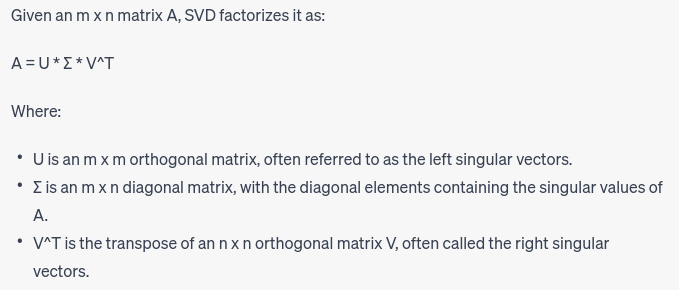

In [55]:
U, sigma, Vt = svds(Ratings_mean, k = 50)
print('Size of sigma: ' , sigma.size)

Size of sigma:  50


In [56]:
sigma = np.diag(sigma)

print('Shape of sigma: ', sigma.shape)
print(sigma)

Shape of sigma:  (50, 50)
[[ 66.27897815   0.           0.         ...   0.           0.
    0.        ]
 [  0.          66.63189776   0.         ...   0.           0.
    0.        ]
 [  0.           0.          67.05008848 ...   0.           0.
    0.        ]
 ...
 [  0.           0.           0.         ... 184.07843884   0.
    0.        ]
 [  0.           0.           0.         ...   0.         234.48221235
    0.        ]
 [  0.           0.           0.         ...   0.           0.
  452.12762679]]


In [57]:
print('Shape of U: ', U.shape)
print('Shape of Vt: ', Vt.shape)

Shape of U:  (1014, 50)
Shape of Vt:  (50, 8832)


In [58]:
all_user_predicted_ratings = np.dot(np.dot(U, sigma), Vt) + user_ratings_mean.reshape(-1, 1)
print('All user predicted rating : ', all_user_predicted_ratings.shape)

All user predicted rating :  (1014, 8832)


In [59]:
preds = pd.DataFrame(all_user_predicted_ratings, columns = Ratings.columns)
print(preds.info()) #rows = users' IDs, columns = movies' IDs
preds

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1014 entries, 0 to 1013
Columns: 8832 entries, 1 to 176271
dtypes: float64(8832)
memory usage: 68.3 MB
None


movieId,1,2,3,4,5,6,7,8,9,10,...,173209,173291,173353,174055,174231,174393,174585,174843,175579,176271
0,0.004382,0.011955,0.042043,0.014955,0.078969,-0.132118,0.002469,-0.004637,0.002429,0.014466,...,0.020835,0.011519,-0.007163,0.021183,0.016662,-0.007163,0.001448,-0.005830,-0.011879,0.036439
1,1.518205,0.306506,0.893966,0.033583,0.870515,0.758828,0.764084,0.021233,0.208274,0.209860,...,0.017336,-0.001572,-0.001959,-0.012522,-0.009560,-0.001959,0.001869,-0.001498,-0.008596,-0.007122
2,0.160724,0.059564,-0.006799,-0.031995,0.036295,-0.029701,-0.023615,-0.005350,-0.025546,0.129053,...,0.011330,-0.000354,0.001911,0.014842,0.011399,0.001911,-0.001526,0.001484,0.012565,0.000338
3,1.709799,0.271691,-0.061339,-0.042654,0.007022,0.056541,0.145880,0.014948,-0.085874,0.263772,...,0.063412,0.007301,0.015084,0.057072,0.045105,0.015084,0.000815,0.013106,0.040110,0.016821
4,0.308411,0.096196,-0.104959,-0.046389,-0.008383,-0.220761,0.027658,0.031782,-0.031032,0.159554,...,0.005234,0.005408,0.001591,0.008815,0.006184,0.001591,-0.002646,0.000822,-0.002076,0.025081
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1009,3.878492,0.928349,2.248039,0.304201,1.452256,3.974032,1.031404,0.060712,1.055963,2.610374,...,-0.122525,0.015703,-0.002932,0.036560,0.028629,-0.002932,0.002468,-0.002298,0.045344,0.050311
1010,2.857203,0.786794,0.220293,-0.053788,0.161836,0.287720,0.003739,0.090882,-0.051996,1.843000,...,0.011318,0.004406,-0.014617,-0.017882,-0.014928,-0.014617,-0.005285,-0.012946,-0.003667,0.025395
1011,2.764431,0.966336,1.267903,0.215599,0.620563,3.950934,0.229043,0.132174,0.768867,2.916861,...,-0.049120,0.011462,-0.016800,0.042693,0.031656,-0.016800,-0.005063,-0.015162,0.045477,0.054479
1012,-0.206319,-0.168244,-0.146184,0.028123,-0.087604,0.156893,-0.120191,-0.035699,0.027148,0.225169,...,0.000091,0.006211,0.003900,-0.034027,-0.025886,0.003900,0.004757,0.003685,-0.017840,0.014614


### Getting recommendation for specific user

#### Preparing data frame to provide movie recommendation to user

In [60]:
userID = 150 # input
# user id start from 1 but rows start from 0
user_row_number = userID - 1
user_predictions = preds.iloc[user_row_number]

print(type(user_predictions))
user_predictions # check the movied ids (total 8832) and their score which will be likely to be given by the user whose specific ID is 150 (from prediction of model)

<class 'pandas.core.series.Series'>


movieId
1         2.353000
2         0.555820
3        -0.095790
4         0.152826
5        -0.205002
            ...   
174393    0.027583
174585    0.024762
174843    0.027353
175579   -0.002179
176271   -0.043521
Name: 149, Length: 8832, dtype: float64

In [61]:
sorted_user_predictions = user_predictions.sort_values(ascending=False)
sorted_user_predictions

movieId
1213    6.658624
593     6.159743
1221    5.881783
1193    5.581254
1089    5.543221
          ...   
4886   -1.609649
8961   -1.636195
4973   -2.047642
4027   -2.197526
3996   -2.681620
Name: 149, Length: 8832, dtype: float64

In [62]:
print(sorted_user_predictions.index[:5])
print(sorted_user_predictions.values[:5])

Int64Index([1213, 593, 1221, 1193, 1089], dtype='int64', name='movieId')
[6.65862368 6.15974285 5.88178333 5.581254   5.54322053]


In [63]:
user_data_df = Data_frame_3[Data_frame_3.userId == (userID)] # from original dataset, not prediction

user_data_df.columns = user_data_df.columns.str.replace('movieId', 'id')
user_data_df.head()

print(len(user_data_df))
print(user_data_df.info())
user_data_df

585
<class 'pandas.core.frame.DataFrame'>
Int64Index: 585 entries, 12124 to 12708
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   userId     585 non-null    int64  
 1   id         585 non-null    int64  
 2   rating     585 non-null    float64
 3   timestamp  585 non-null    int64  
dtypes: float64(1), int64(3)
memory usage: 22.9 KB
None


,userId,id,rating,timestamp
12124,150,1,4.0,945063590
12125,150,6,3.0,945064289
12126,150,11,3.0,945414080
12127,150,14,2.0,945151660
12128,150,16,5.0,945064264
...,...,...,...,...
12704,150,3152,3.0,945592692
12705,150,3167,3.0,945840918
12706,150,3168,3.0,945841234
12707,150,3169,4.0,945066401


In [64]:
movies_df = Train_df2.copy()
print(len(movies_df))
print(movies_df.info())
movies_df.head(2)

4803
<class 'pandas.core.frame.DataFrame'>
Int64Index: 4803 entries, 0 to 4802
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                4803 non-null   int64  
 1   genres                4803 non-null   object 
 2   homepage              1712 non-null   object 
 3   id                    4803 non-null   int64  
 4   keywords              4803 non-null   object 
 5   original_language     4803 non-null   object 
 6   original_title        4803 non-null   object 
 7   overview              4800 non-null   object 
 8   popularity            4803 non-null   float64
 9   production_companies  4803 non-null   object 
 10  production_countries  4803 non-null   object 
 11  release_date          4802 non-null   object 
 12  revenue               4803 non-null   int64  
 13  runtime               4801 non-null   float64
 14  spoken_languages      4803 non-null   object 
 15  status          

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,cast,crew
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",...,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."


In [65]:
print(len(user_data_df)) # movies that user have watched
print(len(movies_df)) # movies info that we have

585
4803


Example of how merging works

list1 = [1,2,5,12]

list2 = [1,2,5,30,12,40,50]

merge(list1, list2) -> list2 is on right and list1 on left

result = list2 = [1,2,5,30,12,40,50] # if merge on  right

result = list1 = [1,2,5,12] # if merge on left

In [66]:
user_full_df = (user_data_df.merge(movies_df, how = 'right', left_on = 'id',
                                   right_on = 'id').sort_values(['rating'], ascending=False))
print(len(user_full_df)) # how = right -> merge df first is user_data_df and second is movie_df
print(user_full_df.info()) # Number of rows is same as in movies_df
user_full_df.head(2)

4803
<class 'pandas.core.frame.DataFrame'>
Int64Index: 4803 entries, 1170 to 4802
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   userId                142 non-null    float64
 1   id                    4803 non-null   int64  
 2   rating                142 non-null    float64
 3   timestamp             142 non-null    float64
 4   budget                4803 non-null   int64  
 5   genres                4803 non-null   object 
 6   homepage              1712 non-null   object 
 7   keywords              4803 non-null   object 
 8   original_language     4803 non-null   object 
 9   original_title        4803 non-null   object 
 10  overview              4800 non-null   object 
 11  popularity            4803 non-null   float64
 12  production_companies  4803 non-null   object 
 13  production_countries  4803 non-null   object 
 14  release_date          4802 non-null   object 
 15  revenue      

,userId,id,rating,timestamp,budget,genres,homepage,keywords,original_language,original_title,...,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,cast,crew
1170,150.0,1213,5.0,945592511.0,40000000,"[{""id"": 53, ""name"": ""Thriller""}, {""id"": 80, ""n...",http://www.miramax.com/movie/the-talented-mr-r...,"[{""id"": 110, ""name"": ""venice""}, {""id"": 131, ""n...",en,The Talented Mr. Ripley,...,128798265,139.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,How far would you go to become someone else?,The Talented Mr. Ripley,7.0,767,"[{""cast_id"": 24, ""character"": ""Tom Ripley"", ""c...","[{""credit_id"": ""57c75cc39251410a5600036f"", ""de..."
93,150.0,296,5.0,945063482.0,200000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 53, ""nam...",NaN,"[{""id"": 83, ""name"": ""saving the world""}, {""id""...",en,Terminator 3: Rise of the Machines,...,435000000,109.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Machines Will Rise.,Terminator 3: Rise of the Machines,5.9,2143,"[{""cast_id"": 6, ""character"": ""The Terminator"",...","[{""credit_id"": ""52fe4234c3a36847f800bcef"", ""de..."


In [67]:
user_full_df = (user_data_df.merge(movies_df, how = 'left', left_on = 'id',
                                   right_on = 'id').sort_values(['rating'], ascending=False))
print(len(user_full_df))  # how = left -> merge df first is movie_df and second is user_data_df
print(user_full_df.info()) # Number of rows is same as in movies_df
user_full_df.head(2)
# we have to do left merging because numbers of must be same with user_data

585
<class 'pandas.core.frame.DataFrame'>
Int64Index: 585 entries, 212 to 195
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   userId                585 non-null    int64  
 1   id                    585 non-null    int64  
 2   rating                585 non-null    float64
 3   timestamp             585 non-null    int64  
 4   budget                142 non-null    float64
 5   genres                142 non-null    object 
 6   homepage              49 non-null     object 
 7   keywords              142 non-null    object 
 8   original_language     142 non-null    object 
 9   original_title        142 non-null    object 
 10  overview              142 non-null    object 
 11  popularity            142 non-null    float64
 12  production_companies  142 non-null    object 
 13  production_countries  142 non-null    object 
 14  release_date          142 non-null    object 
 15  revenue          

,userId,id,rating,timestamp,budget,genres,homepage,keywords,original_language,original_title,...,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,cast,crew
212,150,1221,5.0,945066127,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
56,150,296,5.0,945063482,200000000.0,"[{""id"": 28, ""name"": ""Action""}, {""id"": 53, ""nam...",NaN,"[{""id"": 83, ""name"": ""saving the world""}, {""id""...",en,Terminator 3: Rise of the Machines,...,435000000.0,109.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Machines Will Rise.,Terminator 3: Rise of the Machines,5.9,2143.0,"[{""cast_id"": 6, ""character"": ""The Terminator"",...","[{""credit_id"": ""52fe4234c3a36847f800bcef"", ""de..."


In [ ]:
# checking movie id calling is correct
print(len(user_full_df["id"]))
print(user_full_df["id"][:5])
print("Checking Datatype of movie in df", type(user_full_df["id"][0]))

585
212    1221
56      296
513    2700
204    1207
205    1208
Name: id, dtype: int64
Checking Datatype of movie in df <class 'numpy.int64'>


#### Filtering out what the user have watched

In [ ]:
# we only want to check movie IDs .. Scores were to sort the IDs in order as highest to lowest
movie_id_list_from_prediction = sorted_user_predictions.index.to_list()
print(type(movie_id_list_from_prediction))
print(movie_id_list_from_prediction[:5])
print(len(movie_id_list_from_prediction))
print("Checking Datatype of movie in prediction list", type(movie_id_list_from_prediction[0]))

<class 'list'>
[1213, 593, 1221, 1193, 1089]
8832
Checking Datatype of movie in prediction list <class 'int'>


In [ ]:
# trying how to check the match of movie ID in user_full_data and prediction
# method 1
movie_id_to_check = movie_id_list_from_prediction[0] # which is top rated in movie rating prediction

for i in range(len(user_full_df["id"])):
  if movie_id_to_check == user_full_df["id"][i]:
    print(f"movie {movie_id_to_check} is already watched")

movie 1213 is already watched


In [ ]:
new_movie_id_list = movie_id_list_from_prediction.copy() # to save filter out the movie that the user have not watched
print("Before filtering watched movies", len(new_movie_id_list))

for i, movie_id in enumerate(user_full_df["id"]):
  if movie_id in movie_id_list_from_prediction:
    new_movie_id_list.remove(movie_id)

print("After filtering watched movies", len(new_movie_id_list))

# Check if all watched movies are removed
print("Number of movies that have been watched by user:", len(user_full_df))
# to see if all watched movies are removed
print("Number of movies that have been watched by user:", len(movie_id_list_from_prediction) - len(new_movie_id_list))

Before filtering watched movies 8832
After filtering watched movies 8247
Number of movies that have been watched by user: 585
Number of movies that have been watched by user: 585


In [ ]:
print(new_movie_id_list[:5])

[1784, 3253, 866, 1197, 3552]


In [ ]:
num_recommendations_for_user = 5
print("Movie recommended for user:", new_movie_id_list[:num_recommendations_for_user])

# The result is correct for dataset 3 which has user info but we cannot show movie data
# of this because total number of movies in datasets are not same,

Movie recommended for user: [1784, 3253, 866, 1197, 3552]


#### Filtering out the movies that we do not have the info about.

If we want to show the predictions results that we have information about, we can do this way.

In [ ]:
movies_df[movies_df["id"] == 1784] # 1784 is not in movies_df

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,cast,crew


In [ ]:
movies_df[movies_df["id"] == 866] # 866 is in movies_df

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,cast,crew
1842,25000000,"[{""id"": 18, ""name"": ""Drama""}]",NaN,866,"[{""id"": 212, ""name"": ""london england""}, {""id"":...",en,Finding Neverland,Finding Neverland is an amusing drama about ho...,34.160448,"[{""name"": ""Miramax Films"", ""id"": 14}, {""name"":...",...,116766556,106.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Where will your imagination take you?,Finding Neverland,7.2,1223,"[{""cast_id"": 13, ""character"": ""Sir James Matth...","[{""credit_id"": ""52fe4284c3a36847f802530b"", ""de..."


In [ ]:
movie_ids_in_movies_df = movies_df['id'].tolist()
print(len(movie_ids_in_movies_df))
print(movie_ids_in_movies_df[:5])

4803
[19995, 285, 206647, 49026, 49529]


In [ ]:
print(len(new_movie_id_list)) # from predictions after filtering out watched movies
print(new_movie_id_list[:5])

8247
[1784, 3253, 866, 1197, 3552]


In [ ]:
new_movie_id_list_1 = new_movie_id_list.copy()
new_movie_id_list_2 = []

for i, movie_id in enumerate(new_movie_id_list_1):
  if movie_id in movie_ids_in_movies_df:
    new_movie_id_list_2.append(movie_id)

print(len(new_movie_id_list_1))
print(len(new_movie_id_list_2))

8247
662


In [ ]:
num_recommendations_for_user = 5
print("Movie recommended for user:", new_movie_id_list_2[:num_recommendations_for_user])

Movie recommended for user: [866, 161, 3175, 1573, 2355]


In [ ]:
movies_df.columns

Index(['budget', 'genres', 'homepage', 'id', 'keywords', 'original_language',
       'original_title', 'overview', 'popularity', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'vote_average',
       'vote_count', 'cast', 'crew'],
      dtype='object')

In [ ]:
movie_name = movies_df[movies_df["id"] == 866]["title"].tolist()[0] #try how to query the movie title for specific id
print(movie_name)

Finding Neverland


In [ ]:
def recommendation_by_user_info(dataset, movies_id_list): # like trending movie (not related to voting), example: top most watched movies
  movie_list = []
  cast_list = []
  release_date_list = []
  genres_list = []
  rating_list = []
  overview_list = []
  for movie_id in movies_id_list:
    movie_list.append(dataset[dataset["id"] == movie_id]["title"].tolist()[0])
    cast_list.append(dataset[dataset["id"] == movie_id]["cast"].tolist()[0])
    release_date_list.append(dataset[dataset["id"] == movie_id]["release_date"].tolist()[0])
    genres_list.append(dataset[dataset["id"] == movie_id]["genres"].tolist()[0])
    overview_list.append(dataset[dataset["id"] == movie_id]["overview"].tolist()[0])

  num_movie = len(movies_id_list)
  for i in range(0, num_movie):
    print(f"Top {i+1} Movie's Information")
    print("Movie Name:", movie_list[i])
    print("Released Date:", release_date_list[i])

    key = 'name'
    before_text = '": "'
    after_text = '"}'
    genres = filter_text(genres_list[i], key, before_text, after_text)
    print("Genres:", genres)

    key = 'character'
    before_text = '": "'
    after_text = '",'
    casts = filter_text(cast_list[i], key, before_text, after_text)
    print("Casts:", casts)

    print("Overview:", overview_list[i])
    print("#########################################################")

In [ ]:
num_recommendations_for_user = 5
movies_id_list = new_movie_id_list_2[:num_recommendations_for_user]
recommendation_by_user_info(movies_df, movies_id_list)

Top 1 Movie's Information
Movie Name: Finding Neverland
Released Date: 2004-10-17
Genres: ['Drama']
Casts: ['Sir James Matthew Barrie', 'Sylvia Llewelyn Davies', 'Mrs. Emma du Maurier', 'Charles Frohman', 'Peter Llewelyn Davies', 'Mary Ansell Barrie', 'Wendy', 'Jack Llewelyn Davies', 'George Llewelyn Davies', 'Michael Llewelyn Davies', 'Mrs. Snow', 'Sir Arthur Conan Doyle', 'Peter Pan', "'Hook' / Lord Carlton", 'Smee', 'Nana/Mr. Reilly', 'Mr. Jaspers', 'Theater Patron 3', 'Theater Patron 5']
Overview: Finding Neverland is an amusing drama about how the story of Peter Pan and Neverland came to be. During a writing slump play writer J.M. Barrie meets the widowed Sylvia and her three children who soon become an important part of Barrie’s life and the inspiration that lead him to create his masterpiece “Peter Pan.”
#########################################################
Top 2 Movie's Information
Movie Name: Ocean's Eleven
Released Date: 2001-12-07
Genres: ['Thriller', 'Crime']
Casts: ['D

Lets create a complete function


In [ ]:
def get_movie_id_list(sorted_user_predictions, Data_frame_3,Train_df2):
  user_data_df = Data_frame_3[Data_frame_3.userId == (userID)].copy()
  user_data_df.columns = user_data_df.columns.str.replace('movieId', 'id')
  movies_df = Train_df2.copy()
  user_full_df = (user_data_df.merge(movies_df, how = 'left', left_on = 'id', right_on = 'id').sort_values(['rating'], ascending=False))

  movie_id_list_from_prediction = sorted_user_predictions.index.to_list()
  # filtering out movies what user have watched
  new_movie_id_list = movie_id_list_from_prediction.copy()
  for i, movie_id in enumerate(user_full_df["id"]):
    if movie_id in movie_id_list_from_prediction:
      new_movie_id_list.remove(movie_id)

  # filtering out movies what we do not have info about
  movie_ids_in_movies_df = movies_df['id'].tolist()
  new_movie_id_list_1 = new_movie_id_list.copy()
  new_movie_id_list_2 = []

  for i, movie_id in enumerate(new_movie_id_list_1):
    if movie_id in movie_ids_in_movies_df:
      new_movie_id_list_2.append(movie_id)

  return new_movie_id_list_2

def recommendation_by_user_info(sorted_user_predictions, Data_frame_3, dataset, num_movie): # like trending movie (not related to voting), example: top most watched movies
  movies_id_list = get_movie_id_list(sorted_user_predictions, Data_frame_3, dataset)

  movie_list = []
  cast_list = []
  release_date_list = []
  genres_list = []
  rating_list = []
  overview_list = []
  for movie_id in movies_id_list:
    movie_list.append(dataset[dataset["id"] == movie_id]["title"].tolist()[0])
    cast_list.append(dataset[dataset["id"] == movie_id]["cast"].tolist()[0])
    release_date_list.append(dataset[dataset["id"] == movie_id]["release_date"].tolist()[0])
    genres_list.append(dataset[dataset["id"] == movie_id]["genres"].tolist()[0])
    overview_list.append(dataset[dataset["id"] == movie_id]["overview"].tolist()[0])

  for i in range(0, num_movie):
    print(f"Top {i+1} Movie's Information")
    print("Movie Name:", movie_list[i])
    print("Released Date:", release_date_list[i])

    key = 'name'
    before_text = '": "'
    after_text = '"}'
    genres = filter_text(genres_list[i], key, before_text, after_text)
    print("Genres:", genres)

    key = 'character'
    before_text = '": "'
    after_text = '",'
    casts = filter_text(cast_list[i], key, before_text, after_text)
    print("Casts:", casts)

    print("Overview:", overview_list[i])
    print("#########################################################")

In [ ]:
num_recommendations_for_user = 5
recommendation_by_user_info(sorted_user_predictions, Data_frame_3, Train_df2, num_recommendations_for_user)

Top 1 Movie's Information
Movie Name: Finding Neverland
Released Date: 2004-10-17
Genres: ['Drama']
Casts: ['Sir James Matthew Barrie', 'Sylvia Llewelyn Davies', 'Mrs. Emma du Maurier', 'Charles Frohman', 'Peter Llewelyn Davies', 'Mary Ansell Barrie', 'Wendy', 'Jack Llewelyn Davies', 'George Llewelyn Davies', 'Michael Llewelyn Davies', 'Mrs. Snow', 'Sir Arthur Conan Doyle', 'Peter Pan', "'Hook' / Lord Carlton", 'Smee', 'Nana/Mr. Reilly', 'Mr. Jaspers', 'Theater Patron 3', 'Theater Patron 5']
Overview: Finding Neverland is an amusing drama about how the story of Peter Pan and Neverland came to be. During a writing slump play writer J.M. Barrie meets the widowed Sylvia and her three children who soon become an important part of Barrie’s life and the inspiration that lead him to create his masterpiece “Peter Pan.”
#########################################################
Top 2 Movie's Information
Movie Name: Ocean's Eleven
Released Date: 2001-12-07
Genres: ['Thriller', 'Crime']
Casts: ['D